<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/notebooks/007_Confusion_Matrix_Precision_Recall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Confusion Matrix, Precision i Recall (Dlaczego "Accuracy" kłamie?)

Wszyscy kochają "Dokładność" (Accuracy). Jeśli model ma 99% dokładności, to jest świetny, prawda?
**NIE.**

Wyobraź sobie, że budujesz system do wykrywania terrorystów na lotnisku.
*   Na 1 000 000 pasażerów jest 10 terrorystów.
*   Twój model jest "leniwy" i mówi: **"Wszyscy są bezpieczni"**. Nikogo nie zatrzymuje.

Jaka jest jego dokładność?
$$ \frac{999 990}{1 000 000} = 99.99\% $$

Masz 99.99% dokładności, a przepuściłeś wszystkich 10 terrorystów. Twój model jest bezużyteczny.
Dlatego potrzebujemy **Macierzy Pomyłek (Confusion Matrix)**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1. SYMULACJA DANYCH (Wykrywanie Oszustw Bankowych - Fraud Detection)
# 0 = Uczciwa transakcja (Normalna)
# 1 = Oszustwo (Fraud)

# Stwórzmy sytuację, gdzie mamy 10 transakcji.
# Prawdziwe dane (to, co się stało naprawdę):
y_true = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1] 
# Mamy 7 uczciwych i 3 oszustwa.

# Przewidywania naszego modelu (co "zgadł" komputer):
y_pred = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
# Model trochę pomylił:
# - Oskarżył 2 niewinnych (indeks 5 i 6).
# - Wykrył 2 oszustów (indeks 7 i 8).
# - Przegapił 1 oszusta (indeks 9).

print("Dane przygotowane.")
print(f"Prawdziwe: {y_true}")
print(f"Predykcja: {y_pred}")

Dane przygotowane.
Prawdziwe: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Predykcja: [0, 0, 0, 0, 0, 1, 1, 1, 1, 0]


## Krok 1: Macierz Pomyłek (Mapa Błędów)

Zamiast jednej liczby, chcemy widzieć 4 sytuacje:

1.  **True Negative (TN):** Przewidziałem 0, było 0. (Uczciwy klient, spokój).
2.  **False Positive (FP):** Przewidziałem 1, było 0. (**Fałszywy Alarm** - oskarżyliśmy niewinnego).
3.  **False Negative (FN):** Przewidziałem 0, było 1. (**Przeoczenie** - złodziej uciekł!).
4.  **True Positive (TP):** Przewidziałem 1, było 1. (Sukces - złapaliśmy złodzieja).

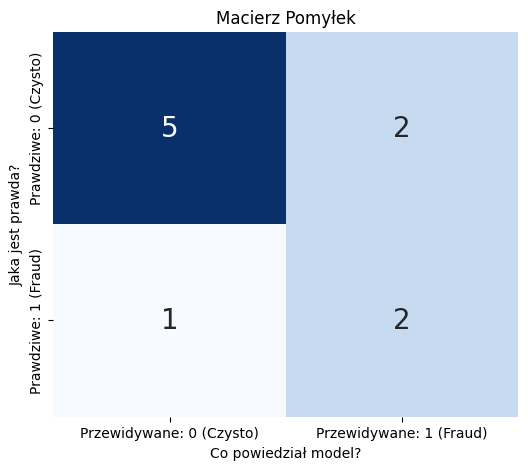

TN (Dobrze - spokój): 5
FP (Fałszywy Alarm):  2
FN (Przeoczenie!):    1
TP (Sukces):          2


In [2]:
# Generujemy Macierz Pomyłek
cm = confusion_matrix(y_true, y_pred)

# Wizualizacja
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 20},
            xticklabels=['Przewidywane: 0 (Czysto)', 'Przewidywane: 1 (Fraud)'],
            yticklabels=['Prawdziwe: 0 (Czysto)', 'Prawdziwe: 1 (Fraud)'])
plt.xlabel('Co powiedział model?')
plt.ylabel('Jaka jest prawda?')
plt.title('Macierz Pomyłek')
plt.show()

# Rozpiszmy to na zmienne
tn, fp, fn, tp = cm.ravel()
print(f"TN (Dobrze - spokój): {tn}")
print(f"FP (Fałszywy Alarm):  {fp}")
print(f"FN (Przeoczenie!):    {fn}")
print(f"TP (Sukces):          {tp}")

## Krok 2: Precision (Precyzja) vs Recall (Czułość)

Skoro "Accuracy" kłamie, używamy dwóch lepszych metryk. Zawsze jest coś za coś.

### 1. Precision (Precyzja)
**Pytanie:** *"Jak już kogoś aresztujesz, to czy na pewno jest winny?"*
Jeśli Precyzja jest niska, to Twój model "strzela na oślep" i oskarża niewinnych (dużo False Positive).
$$ Precision = \frac{TP}{TP + FP} $$

### 2. Recall (Czułość / Pełność)
**Pytanie:** *"Czy udało Ci się wyłapać wszystkich złodziei z miasta?"*
Jeśli Recall jest niski, to znaczy, że wielu złodziei uciekło (dużo False Negative).
$$ Recall = \frac{TP}{TP + FN} $$

In [3]:
# Obliczamy metryki
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"--- WYNIKI MODELU ---")
print(f"Accuracy (Dokładność):  {accuracy:.2f} (Ogólnie nieźle, ale mylące)")
print("-" * 30)
print(f"PRECISION (Precyzja):   {precision:.2f}")
print("Interpretacja: Kiedy model krzyczy 'ZŁODZIEJ!', ma rację tylko w 50% przypadków. (2 trafił, 2 pomylił).")
print("-" * 30)
print(f"RECALL (Czułość):       {recall:.2f}")
print("Interpretacja: Model wykrył 67% wszystkich złodziei. Jeden mu uciekł.")
print("-" * 30)
print(f"F1-SCORE (Średnia):     {f1:.2f}")
print("To jest średnia harmoniczna między Precision a Recall. Dobra jedna liczba do oceny.")

--- WYNIKI MODELU ---
Accuracy (Dokładność):  0.70 (Ogólnie nieźle, ale mylące)
------------------------------
PRECISION (Precyzja):   0.50
Interpretacja: Kiedy model krzyczy 'ZŁODZIEJ!', ma rację tylko w 50% przypadków. (2 trafił, 2 pomylił).
------------------------------
RECALL (Czułość):       0.67
Interpretacja: Model wykrył 67% wszystkich złodziei. Jeden mu uciekł.
------------------------------
F1-SCORE (Średnia):     0.57
To jest średnia harmoniczna między Precision a Recall. Dobra jedna liczba do oceny.


## Co jest ważniejsze?

To zależy od biznesu!

1.  **Wolisz wysoki RECALL (Czułość)?**
    *   Przykład: **Wykrywanie Raka.**
    *   Lepiej zrobić fałszywy alarm (wysłać zdrowego na dodatkowe badania - FP), niż przegapić chorego i pozwolić mu umrzeć (FN).
    *   *Akceptujemy pomyłki w jedną stronę, byle nikogo nie przegapić.*

2.  **Wolisz wysoką PRECISION (Precyzję)?**
    *   Przykład: **System Antyspamowy (lub filtr YouTube).**
    *   Jeśli Twój ważny mail od szefa trafi do spamu (FP), będziesz wściekły.
    *   Lepiej wpuścić trochę śmieci do skrzynki (FN), niż wyrzucić jeden ważny list.
    *   *System musi być na 100% pewny, zanim coś zablokuje.*